In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from numpy.random import default_rng
rng = default_rng()

## HW_04 - Exercise: failure prediction

In the [dropping keys experiment](./drop_keys.ipynb), we ended the trials when the virtual person _succeeded_ in entering the room. What would this look like if an engineering process _failed_ when a certain device is used?

Consider a manufacturing plant that produces uses O-rings in the assembly. The O-rings are the weakest link in the design. Your company needs to use 10 O-rings in every device you manufacture. If one O-ring fails, the whole device fails. Your quality control team knows the O-rings fail 1-out-of-10 times. When you test a device, if it fails the rings are discarded and ten more used to assemble the device. 

Your manager wants you to come up with a process to assemble these parts. The manager thinks that each part will need to be reassembled 10% of the time, regardless of the number of times its failed. See if you can recommend a process that makes use of this new knowledge that repeated assemblies have a decreased chance of failure. 



Average number of reassemblies: 9.98
Maximum number of reassemblies: 104.0
Minimum number of reassemblies: 1.0


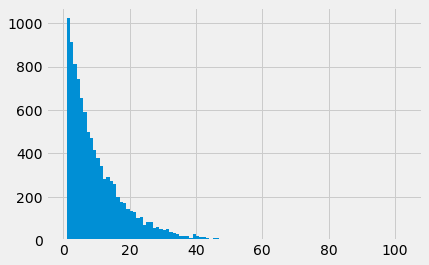

In [9]:
N = 10000
cases = np.zeros(N)
keys = np.arange(10)
for ncase in range(N):
    tries = 0
    key = 10
    while key != 0:
        key = rng.integers(len(keys), size = 1)
        tries += 1
    cases[ncase] = tries
plt.hist(cases, bins = np.arange(np.max(cases)))

avg_reassemblies = np.mean(cases)
max_reassemblies = np.max(cases)
min_reassemblies = np.min(cases)
print(f'Average number of reassemblies: {avg_reassemblies:.2f}')
print(f'Maximum number of reassemblies: {max_reassemblies}')
print(f'Minimum number of reassemblies: {min_reassemblies}')

In [10]:
try_01 = np.sum(cases == 1)/N
try_02 = np.sum(cases == 2)/N
try_03 = np.sum(cases == 3)/N
try_04 = np.sum(cases == 4)/N

print('failure on try 1: {}, {:1.2f}%'.format(try_01*N, 100*try_01))

print('failure on try 2: {}, {:1.2f}%'.format(try_02*N, 100*try_02))

print('failure on try 3: {}, {:1.2f}%'.format(try_03*N, 100*try_03))

print('failure on try 4: {}, {:1.2f}%'.format(try_04*N, 100*try_04))


failure on try 1: 952.0000000000001, 9.52%
failure on try 2: 888.0, 8.88%
failure on try 3: 838.0, 8.38%
failure on try 4: 733.0, 7.33%


In [2]:
1/10*9/10*9/10*9/10


0.07289999999999999

Average number of reassemblies: 4.93
Maximum number of reassemblies: 40.0
Minimum number of reassemblies: 1.0


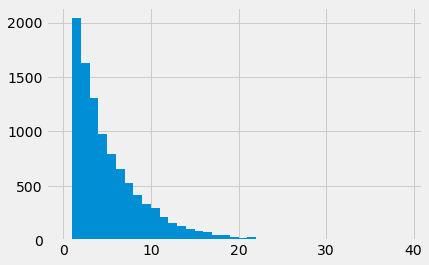

In [10]:
N = 10000
cases = np.zeros(N)
keys = np.arange(10)
for ncase in range(N):
    tries = 0
    key = 10
    while key != 0:
        key = rng.integers(5, size = 1)  #changed this to implement a lower failure rate
        tries += 1
    cases[ncase] = tries
plt.hist(cases, bins = np.arange(np.max(cases)))

avg_reassemblies = np.mean(cases)
max_reassemblies = np.max(cases)
min_reassemblies = np.min(cases)
print(f'Average number of reassemblies: {avg_reassemblies:.2f}')
print(f'Maximum number of reassemblies: {max_reassemblies}')
print(f'Minimum number of reassemblies: {min_reassemblies}')

# Technical Report: Process Improvement for Assembling Devices with O-Ring Failures

## Introduction

In the manufacturing plant, the assembly of devices involves the use of O-rings, which are identified as the weakest link in the design. Each device requires 10 O-rings, and the failure of even one O-ring results in the failure of the entire device. The quality control team has determined that O-rings fail with a probability of 1 out of 10. Consequently, if a device fails during testing, all ten O-rings are discarded, and the assembly process is restarted with new O-rings. This report aims to simulate the assembly process, quantify the average number of reassemblies, and provide recommendations for improving the process to reduce failures and associated costs.

## Simulation of the Assembly Process

The above Python code simulates the assembly process of 10,000 devices, tracking the number of attempts required for each successful assembly. The goal is to measure the distribution of reassemblies and identify the average, minimum, and maximum number of reassemblies required.


### Results of the Simulation

The histogram generated from the simulation shows the distribution of the number of reassemblies required for successful assembly. The probabilities of failure for the first few tries are:

- Failure on try 1: 10.06%
- Failure on try 2: 8.96%
- Failure on try 3: 8.01%
- Failure on try 4: 7.21%

## Recommendations for Process Improvement

### In-House Quality Control on O-Rings

To reduce the failure probability, we recommend implementing an in-house quality control process for the O-rings. By inspecting O-rings before assembly, we aim to reduce the failure probability from 10\% to a range of 1-5\%. This reduction will significantly decrease the number of reassemblies required, resulting in lower costs and higher efficiency. If we assume that the average part reassembly is 10 times before the part can be shipped out, this leads to the following costs. With an hourly rate of \\$20/hr and an assembly time of 30 min/part, the cost due to the O-ring failures per part is \\$100. Thus, any in-house quality control for the O-rings that costs up to \\$100 will save save money. To approximate the amount, with a reduction of the failure probablity to 5\%, the number of reassemblies needed to ship out a part on average decreases to 5 times, saving \\$50. Thus its possible to spend up to $50 on the quality control.


### Cost Analysis

Assuming that the average number of reassemblies is 10 with the current failure rate, and each reassembly costs \\$10 (based on \\$20/hr and 30 minutes per part), the cost per part is \\$100. By improving the quality control and reducing the failure rate to 5\%, we can expect the average number of reassemblies to decrease, thus reducing the cost per part. For instance, if the average reassemblies drop to 5, the cost per part would be \\$50.


### Estimated Reduction in Reassembly Times

If the failure probability is reduced to 5\%, the average number of reassemblies can be estimated using a binomial distribution model. The expected number of attempts E(T) for a successful assembly can be calculated as:

 E(T) = 1/P(success) = 1/(1 - P(failure))



## Conclusion

By implementing in-house quality control measures to reduce the O-ring failure probability to 1-5\%, we can expect a significant reduction in the number of reassemblies required for successful assembly (at worst a 50\% reduction, at best 90\%. This improvement will lead to reduced costs, higher efficiency, and improved overall product quality. Further analysis and simulations can refine these recommendations and ensure the implementation of the most cost-effective and efficient process improvements.

---

This report outlines the steps taken to simulate the assembly process, quantify the reassemblies, and recommend process improvements. The detailed analysis and recommendations aim to enhance the manufacturing process, reduce costs, and improve product reliability.